# Data cleaning and preparation for a dashboard

This dataset is from [Kaggle](https://www.kaggle.com/datasets/carrie1/ecommerce-data). This datatset contains real E-commerce transactions from 2010 to 2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

**Goal**: As highlighted by the title, this notebook aims to prepare and clean the Ecommerce data into a usable table (Excel file) for a dashboard using DataViz tools (Tableau/PowerBI).

**How to run**: This notebook is written in **Python** via **GoogleColab**.


**Precision**: This **notebook is not for production**, rather, it highlights the steps I took to prepare this data for a dashboard.



---



We will proceed with adding all the liberaries that will be necessary for running all the cells below.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import kagglehub
import numpy as np

## Data importing

This code can be directly copied via Kaggle and is used to import the data into our notebook.

In [ ]:
path = kagglehub.dataset_download("carrie1/ecommerce-data")
path = os.path.join(path, "data.csv")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'ecommerce-data' dataset.
Path to dataset files: /kaggle/input/ecommerce-data/data.csv


Let's import the dataset in a pandas Dataframe, and quickly visualize the data to make sure we can read it.

In [ ]:
df = pd.read_csv(path, encoding='latin-1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


So far, all is good! We can jump into data discovery and cleaning.

## Data Cleaning

Let's visualize more information about the dataframe.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


There are missing values in these columns:
*   Description
*   CustomerID





These columns do not have the right types:
- Date should be the right type
- CustomerId should not be a float

We are going to work on these elements in the next steps!



---



Since we want to use this data for a dashboard espicially for sales insights, I will not delete the missing data. I will only fill in the missing data. We need to see also if the missing data is very negligeable or not.

Before any other modifications, I will proceed into removing duplicates in case they exist!

In [ ]:
# Drop the doubles
df = df.drop_duplicates()
print(f"The length of the dataset is: {len(df)}")

The length of the dataset is: 536641


There were duplicates!

In [ ]:
# Missing values in both columns Description and CustomerID
df_without_nulls = df[(pd.notna(df['Description'])) & (pd.notna(df['CustomerID']))]

print(f"The percentage of non-null columns is: {round((len(df_without_nulls)/len(df))*100, 2)}%")

The percentage of non-null columns is: 74.84%


About 75% of the data is present, this means that we cannot just remove this data. It will create a bias in our dashboards. I will definitely just go with retaining the data as is while labeling the rows with missing data.

In [ ]:
df['is_CustomerID_missing'] = pd.isna(df['CustomerID'])
df['is_Description_missing'] = pd.isna(df['Description'])

Let's also label the empty descriptions with "NO DESCRIPTION" instead!

In [ ]:
df['Description'] = df['Description'].fillna('NO DESCRIPTION')



---



We can proceed to the second element, which is converting our data into the right data types (InvoiceDate and CustomerID).

In [ ]:
# Convert the columns types into the right ones
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype('Int64')

Let's review if our corrections took place.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   InvoiceNo               536641 non-null  object        
 1   StockCode               536641 non-null  object        
 2   Description             536641 non-null  object        
 3   Quantity                536641 non-null  int64         
 4   InvoiceDate             536641 non-null  datetime64[ns]
 5   UnitPrice               536641 non-null  float64       
 6   CustomerID              401604 non-null  Int64         
 7   Country                 536641 non-null  object        
 8   is_CustomerID_missing   536641 non-null  bool          
 9   is_Description_missing  536641 non-null  bool          
dtypes: Int64(1), bool(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 38.4+ MB


**I will assume that the prices are standardized in one unit (Pound since the company is UK based)! And that no exchange needs to be done. This is because no explanations as to that were given in the description of the dataset.**

### Handling returns or cancelled transactions

Let's review some stats about our dataset!

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.0
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.0
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.0
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.0
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.0
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.0
std,219.130156,NaN,97.233118,1714.006089


While reviewing data, we can notice that we have negative quantities and prices! This likely means returned or cancelled orders. We will keep them as well since they can be interesting elements for our dashbaord.

If we look closely in our data, we can see in our transactions we have both the debited transaction and the returned transaction. And this is good and can be used in our dashboard.

In [ ]:
display(df[(df['Quantity']==80995) | (df['Quantity']==-80995)])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_CustomerID_missing,is_Description_missing
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446,United Kingdom,False,False
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446,United Kingdom,False,False


However, for UnitPrice, it doesn't necessarily make sense for it to be negative since it is the price of a product. Let's look the cases where we have negative prices!

In [ ]:
display(df[df['UnitPrice']<0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_CustomerID_missing,is_Description_missing
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,True,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,True,False


In [ ]:
display(df[df['Description']=='Adjust bad debt'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_CustomerID_missing,is_Description_missing
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,<NA>,United Kingdom,True,False
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,<NA>,United Kingdom,True,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,<NA>,United Kingdom,True,False


These lines need to be removed, since it doesn't correspond to the sales.

In [ ]:
df = df[df['Description'] != 'Adjust bad debt']

We also have some columns with UnitPrice equals zero, this means maybe that the products were given for free out of promotions/discounts etc. We do not have any business rules here, so I will leave them in the dataset as they are.

In [ ]:
display(df[df['UnitPrice']==0])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_CustomerID_missing,is_Description_missing
622,536414,22139,NO DESCRIPTION,56,2010-12-01 11:52:00,0.0,<NA>,United Kingdom,True,True
1970,536545,21134,NO DESCRIPTION,1,2010-12-01 14:32:00,0.0,<NA>,United Kingdom,True,True
1971,536546,22145,NO DESCRIPTION,1,2010-12-01 14:33:00,0.0,<NA>,United Kingdom,True,True
1972,536547,37509,NO DESCRIPTION,1,2010-12-01 14:33:00,0.0,<NA>,United Kingdom,True,True
1987,536549,85226A,NO DESCRIPTION,1,2010-12-01 14:34:00,0.0,<NA>,United Kingdom,True,True
...,...,...,...,...,...,...,...,...,...,...
536981,581234,72817,NO DESCRIPTION,27,2011-12-08 10:33:00,0.0,<NA>,United Kingdom,True,True
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,<NA>,United Kingdom,True,False
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,<NA>,United Kingdom,True,False
538554,581408,85175,NO DESCRIPTION,20,2011-12-08 14:06:00,0.0,<NA>,United Kingdom,True,True


In [ ]:
print(f"The percentage of free orders : {round(len(df[df['UnitPrice']==0])/len(df)*100,2)}%")

The percentage of free orders : 0.47%


This is also very negligeable, so wether it stays or it is removed it won't make a big difference. And we will not be using this data for modeling so we can retain them.

Let's also label the negative quantities as returned products, they can be interesting to use in the dashboard!

In [ ]:
df['isReturn'] = df['Quantity']<0

### Stock code errors

Here we will explore the stock codes in case they have errors.

In [ ]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 4069


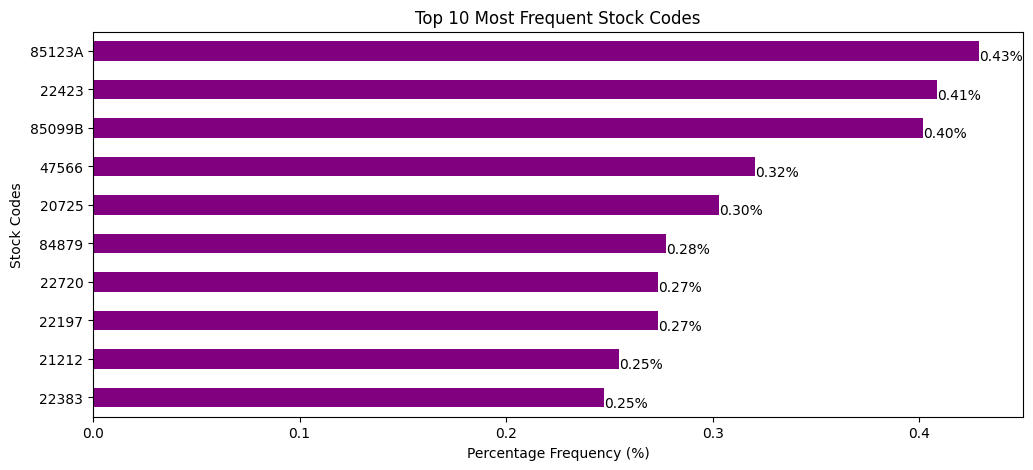

In [ ]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='purple')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

We observe that while most stock codes are composed of 5 or 6 characters, there are some anomalies like the code 'POST'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products.

In [ ]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    4037
4      14
0      12
6       5
1       1
Name: count, dtype: int64


A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.

In [ ]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
DOT
M
BANK CHARGES
S
AMAZONFEE
m
DCGSSBOY
DCGSSGIRL
PADS
CRUK


In [ ]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.55%


Very small percentage, so we can safely remove it!

In [ ]:
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

### Description cleaning

The description of the products will be very useful for our dashboard espicially to review the usual products that sell the best.

In [ ]:
# The amount of unique descriptions
len(df['Description'].unique())

4211

There are too many unique descriptions. We can try hover over a few in case we can see some errors.

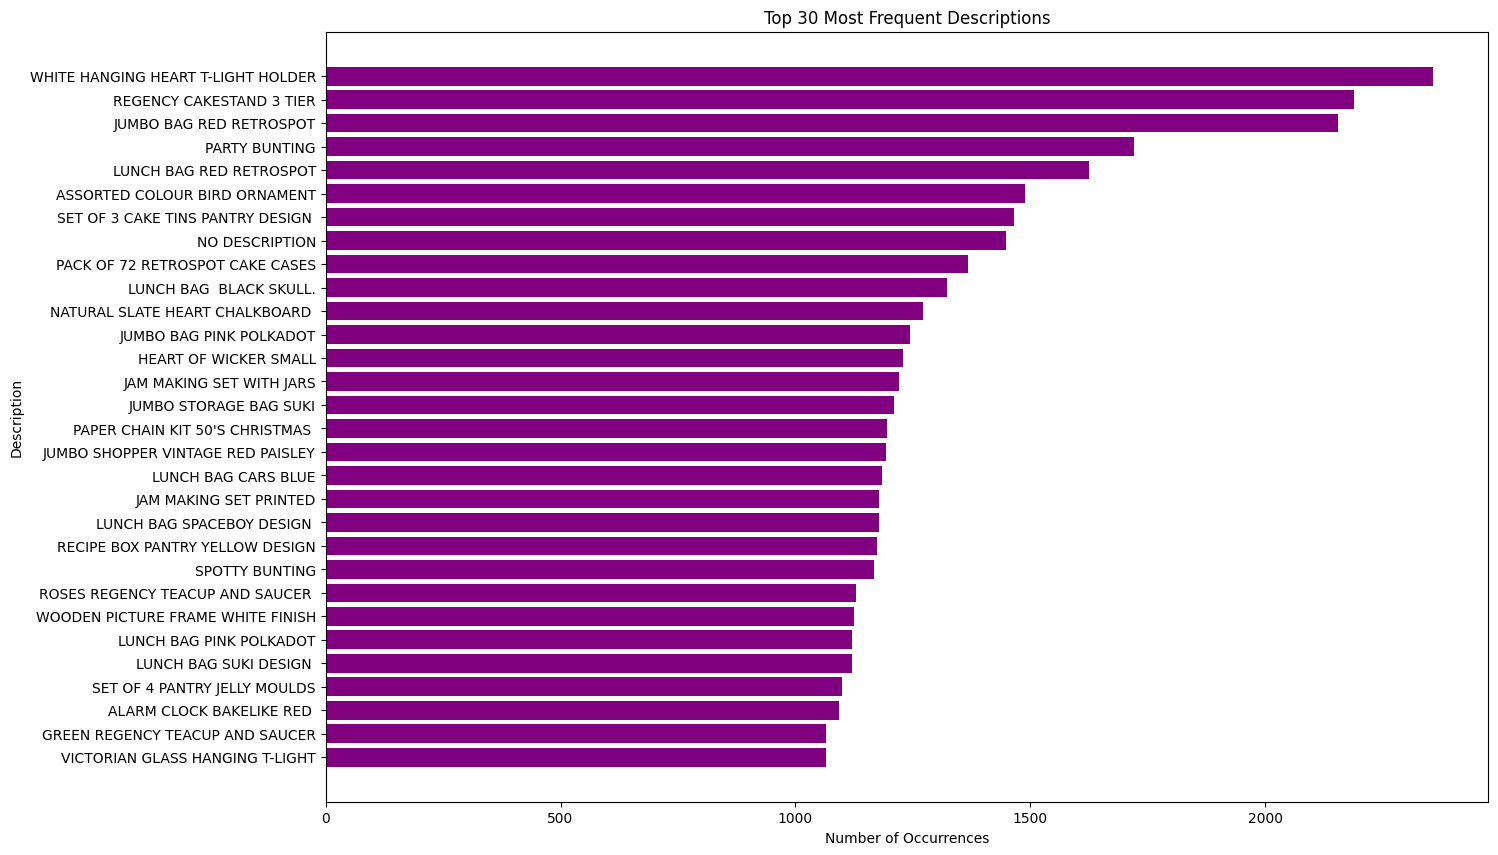

In [ ]:
# Calculate the occurrence of each unique description and sort them
# Try to carefully visualize most of the descriptions in case weird ones are present
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[0:30]

# Plotting
plt.figure(figsize=(15,10))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='purple')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

It is hard to hover over all the data like this since there a lot of descriptions. Let's check if all the descriptions are in Uppercase.

In [ ]:
lowercase_descriptions = df[df['Description'] != df['Description'].str.upper()]['Description'].unique()
lowercase_descriptions

array(['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x45cm',
       'BAG 125g SWIRLY MARBLES', 'BAG 250g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 40x40cm',
       'FRENCH BLUE METAL DOOR SIGN No', "Dr. Jam's Arouzer Stress Ball",
       '3 TRADITIONAl BISCUIT CUTTERS  SET',
       'NUMBER TILE COTTAGE GARDEN No', 'amazon',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM', 'check', 'damages',
       "Dad's Cab Electronic Meter", 'NUMBER TILE VINTAGE FONT No ',
       '*Boombox Ipod Classic', 'faulty', 'Dotcom sales', 'amazon sales',
       '*USB Office Mirror Ball', 'POLYESTER FILLER PAD 30CMx30CM',
       'Dotcomgiftshop Gift Voucher £40.00', 'Found',
       'Dotcomgiftshop Gift Voucher £50.00', 'reverse 21/5/10 adjustment',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00', 'mouldy, thrown away.',
       'found', 'counted', 'Giv

We can definitely see that there are lots of non product descriptions. This is will need to be deleted. It would be easier to have remove the wrongly flagged descriptions and put them in uppercase.

I chose to keep some products such as giftcards since they were sold anyway, but this depends on the business rules of course. It is wise to check the transactions in the dataset with each of these descriptions to understand what is wrong.

In [ ]:
wrongly_flagged_descriptions = ['BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x45cm',
       'BAG 125g SWIRLY MARBLES', 'BAG 250g SWIRLY MARBLES',
       'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 40x40cm',
       'FRENCH BLUE METAL DOOR SIGN No', "Dr. Jam's Arouzer Stress Ball",
       '3 TRADITIONAl BISCUIT CUTTERS  SET',
       'NUMBER TILE COTTAGE GARDEN No',
       'FOLK ART GREETING CARD,pack/12',
       'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
       'POLYESTER FILLER PAD 65CMx65CM',
       "Dad's Cab Electronic Meter", 'NUMBER TILE VINTAGE FONT No ',
       '*Boombox Ipod Classic',
       '*USB Office Mirror Ball', 'POLYESTER FILLER PAD 30CMx30CM',
       'Dotcomgiftshop Gift Voucher £40.00',
       'Dotcomgiftshop Gift Voucher £50.00', 'reverse 21/5/10 adjustment',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00',
       'Dotcomgiftshop Gift Voucher £10.00',
        'POLYESTER FILLER PAD 60x40cm',
       'FLOWERS HANDBAG blue and orange',
       'THE KING GIFT BAG 25x24x12cm',
       'Dotcomgiftshop Gift Voucher £100.00']

to_remove_descriptions = np.setdiff1d(lowercase_descriptions, wrongly_flagged_descriptions)

df = df[~df['Description'].isin(to_remove_descriptions)].copy()
df['Description'] = df['Description'].str.upper()

It would be interesting to add a new feature that groups the products into categories, this will be easier in the dashboard to visualize!

Since the descriptions are too many, we can try using an AI instead to help us. I will save the different descriptions into a csv file that I can upload to an AI and get all the different categories.

**Of course we can do that here since the dataset is open source, but this would be risky in case of private data!**

In [ ]:
pd.Series(df['Description'].unique()).to_csv("description_counts.csv", header=True)

After carefully analysizng all the product descriptions, we created categories using an AI (to go faster, since we don't know all the products or categories that this compay makes).

In [ ]:
# Define categories and keywords
categories = {
    "Home Decor": ["LANTERN", "CANDLE", "CUSHION", "VASE", "FRAME", "MIRROR", "CLOCK", "DOORSTOP", "LAMPSHADE"],
    "Kitchenware": ["MUG", "PLATE", "BOWL", "TEAPOT", "TRAY", "CUTLERY", "CUP", "JAR", "BOTTLE"],
    "Textiles": ["BAG", "TOTE", "APRONS", "RUG", "TOWEL", "HANGER", "HANDKERCHIEF"],
    "Stationery": ["NOTEBOOK", "CARD", "WRAP", "PAPER", "PEN", "PENCIL", "RIBBON"],
    "Toys & Games": ["TOY", "PUZZLE", "GAME", "PLAY", "BALL"],
    "Jewelry & Accessories": ["BRACELET", "NECKLACE", "RING", "EARRING", "BROOCH"],
    "Holiday/Seasonal": ["CHRISTMAS", "EASTER", "VALENTINE", "HALLOWEEN", "FAIRY"],
    "Garden/Outdoor": ["PLANT", "GARDEN", "FLOWER", "HAMMOCK"],
    "No description": ["NO DESCRIPTION"],
    "Miscellaneous": []  # fallback bucket
}

# Function to classify descriptions
def classify_description(desc):
    desc_upper = str(desc).upper()
    for category, keywords in categories.items():
        if any(keyword in desc_upper for keyword in keywords):
            return category
    return "Miscellaneous"

# Create new Category column
df["Category"] = df["Description"].apply(classify_description)


## New features

This section involves adding new features to our dataset, that can be used directly in our dashboard.

**1 - The date and hour of the transaction to have cleaner columns.**

In [ ]:
# Let's introduce some timing columns
df['Date'] = df['InvoiceDate'].dt.date
df['Hour'] = df['InvoiceDate'].dt.hour

**2- The total price of the order.**

In [ ]:
df['TotalPrice'] = df['UnitPrice']*df['Quantity']

In [ ]:
display(df)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,is_CustomerID_missing,is_Description_missing,isReturn,Category,Date,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False,False,Miscellaneous,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,False,Home Decor,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False,False,Kitchenware,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,False,Kitchenware,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False,False,Miscellaneous,2010-12-01,8,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,False,False,False,Miscellaneous,2011-12-09,12,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,False,False,False,Miscellaneous,2011-12-09,12,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,False,False,False,Kitchenware,2011-12-09,12,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,False,False,False,Kitchenware,2011-12-09,12,16.60


## Remove unnecessary columns

Since the goal is to create a dashboard that is helpful to for example the product teams, we will need to remove a few unimportant columns for our dashboard such as the description since it won't be used and the stockcode

In [ ]:
df = df.drop(columns=['Description', 'StockCode'])

## Save data

Since, we don't have cloud where to store a table, we will directly save it in an CSV file and import it later on in Tableau / PowerBI

In [ ]:
df = df.tail(90000)

In [ ]:
df.to_csv("data_cleaned.csv", header=True)